# EDA Notebook 3

## Import libraries

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import Dataset

In [176]:
divorce = pd.read_csv('Datasets/divorce.csv')
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


## Explore data

In [177]:
divorce.shape

(2209, 10)

In [178]:
divorce.columns

Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date', 'marriage_duration',
       'num_kids'],
      dtype='object')

In [179]:
divorce.describe()

,income_man,income_woman,marriage_duration,num_kids
count,2209.000000,2209.000000,2209.000000,1333.000000
mean,7922.986410,6793.164545,9.606609,1.672918
std,7693.796497,6562.928689,7.266696,0.732858
min,3.000000,3.500000,1.000000,1.000000
25%,3600.000000,3000.000000,4.000000,1.000000
50%,6000.000000,5000.000000,8.000000,2.000000
75%,10000.000000,8000.000000,14.000000,2.000000
max,80000.000000,90000.000000,32.000000,5.000000


In [180]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


## Checking duplicate data

In [181]:
divorce[divorce.duplicated(keep="first")]

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids


In [182]:
divorce.duplicated(keep="first").sum()

0

## Checking for null data

In [183]:
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64

In [184]:
(divorce.isna().sum() / (len(divorce))) * 100

divorce_date          0.000000
dob_man               0.000000
education_man         0.181077
income_man            0.000000
dob_woman             0.000000
education_woman       0.000000
income_woman          0.000000
marriage_date         0.000000
marriage_duration     0.000000
num_kids             39.655953
dtype: float64

In [185]:
divorce.loc[divorce['education_man'].isna(),:]

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
246,2011-04-07,1979-08-04,NaN,3600.0,1976-05-02,Primary,3400.0,1997-07-18,13.0,2.0
635,2008-09-10,1967-02-23,NaN,5000.0,1970-04-02,Secondary,1600.0,1988-03-10,6.0,3.0
1665,2014-06-23,1983-01-01,NaN,1700.0,1989-01-01,Secondary,1700.0,2006-06-09,8.0,1.0
1753,2012-01-25,1978-07-09,NaN,3000.0,1974-03-23,Preparatory,4000.0,2010-10-12,1.0,NaN


In [186]:
limit = len(divorce) * 0.05 # 5% check
print(limit)
cols_to_drop = divorce.columns[divorce.isna().sum() <= limit]
print(cols_to_drop)

110.45
Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date',
       'marriage_duration'],
      dtype='object')


In [187]:
divorce.dropna(subset=cols_to_drop, inplace=True)

In [188]:
divorce.isna().sum()

divorce_date           0
dob_man                0
education_man          0
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             875
dtype: int64

In [189]:
divorce.loc[divorce.isnull().any(axis=1)].head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN
5,2012-01-02,1973-09-07,Professional,20000.0,1974-05-20,Professional,15.0,2000-03-08,11.0,NaN
11,2010-01-03,1987-05-04,Preparatory,2000.0,1986-09-21,Preparatory,2000.0,2005-07-12,4.0,NaN


In [190]:
divorce["num_kids"].value_counts()

num_kids
1.0    620
2.0    549
3.0    141
4.0     17
5.0      3
Name: count, dtype: int64

In [191]:
divorce['num_kids'].fillna(0, inplace=True)

In [192]:
divorce["num_kids"].value_counts()

num_kids
0.0    875
1.0    620
2.0    549
3.0    141
4.0     17
5.0      3
Name: count, dtype: int64

## Changing data types

In [193]:
# during import we can directly do it like if we knoe dataset beforehand:
# divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])

divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce["divorce_date"] = pd.to_datetime(divorce["divorce_date"])
divorce["dob_man"] = pd.to_datetime(divorce["dob_man"])
divorce["dob_woman"] = pd.to_datetime(divorce["dob_woman"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [194]:
divorce["marriage_day"] = divorce["marriage_date"].dt.day
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce["marriage_year"] = divorce["marriage_date"].dt.year

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_day,marriage_month,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,26,6,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,0.0,2,9,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2,2,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,0.0,13,5,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,0.0,6,8,2007


## Visualization

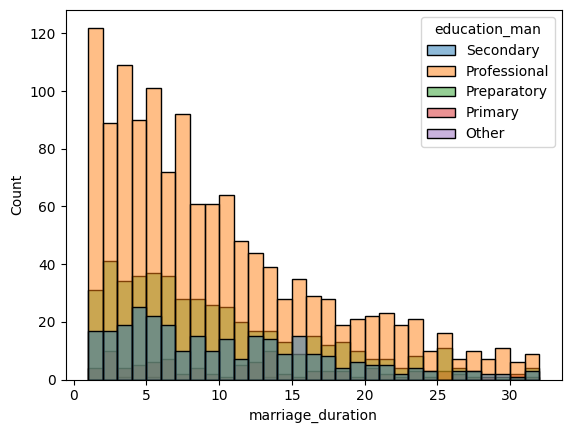

In [195]:
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

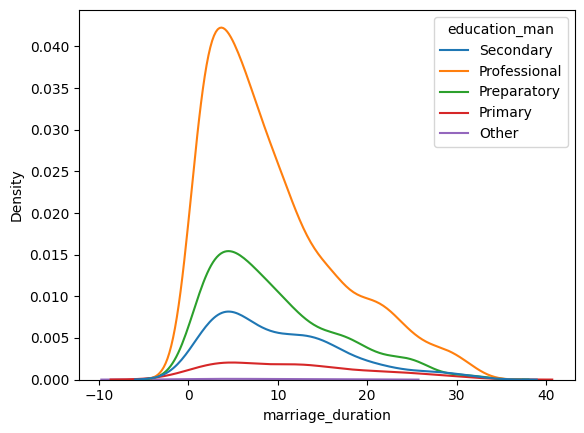

In [196]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()

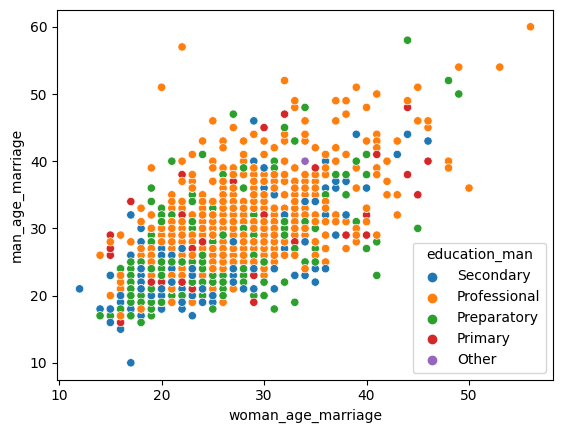

In [197]:
divorce ["man_age_marriage"] = divorce["marriage_year"] - divorce ["dob_man"].dt.year
divorce ["woman_age_marriage"] = divorce ["marriage_year"] - divorce ["dob_woman"].dt.year

sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage", hue="education_man")
plt.show()

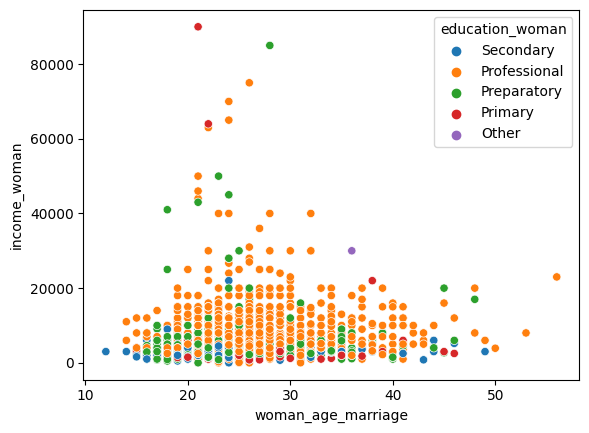

In [198]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

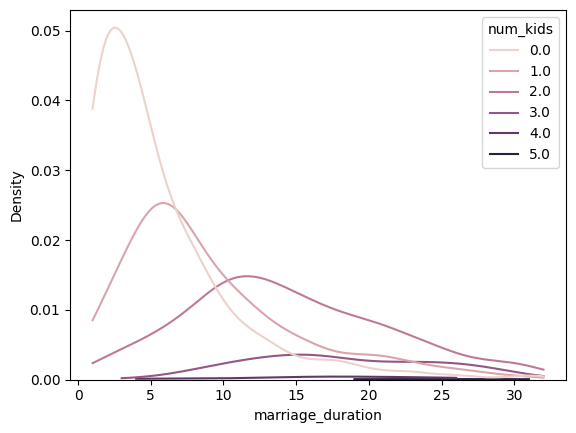

In [199]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

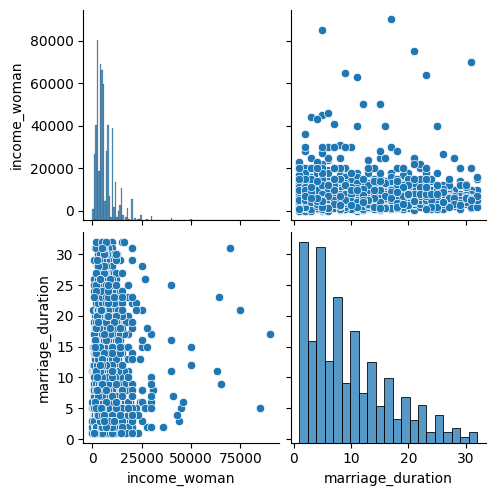

In [200]:
sns.pairplot(data=divorce, vars=['income_woman','marriage_duration'])
plt.show()

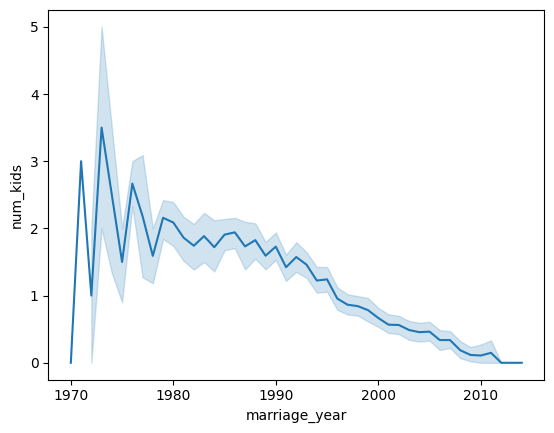

In [201]:
sns.lineplot(data=divorce,x="marriage_year", y="num_kids")
plt.show()